## Car Brand Classification Using Deep Learning

In [6]:
## Importing libraries
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.layers import Input, Lambda, Flatten, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img ###helps in data augmentation
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/My Drive/Datasets/Train'
valid_path = '/content/drive/My Drive/Datasets/Test'

In [8]:
##importing the resnet50 library as shown below.
##Also, we are using imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE+[3], weights =   'imagenet', include_top = False)
##IMAGE_SIZE+[3] ==>[3] RGB channel

94773248/94765736 [==============================] - 1s 0us/step


In [9]:
#resnet.summary()

In [10]:
##not training existing weights
for layer in resnet.layers:
  layer.trainable = False

In [11]:
##useful for getting number of output classes from training folder
folders = glob('/content/drive/My Drive/Datasets/Train/*')

In [12]:
##the layers which we are going to add
x = Flatten()(resnet.output)

In [13]:
predictions = Dense(len(folders), activation='softmax')(x)

##creating the model
model = Model(inputs = resnet.input , outputs = predictions)

In [14]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [15]:
##setting the  optimization and cost func for the model
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [16]:
##using the image datagenerator to import images from the dataset
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
#we have to give same target size of images as we have already specified
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Train', target_size=(224,224), batch_size=32, class_mode = 'categorical')

Found 74 images belonging to 3 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Datasets/Test', target_size=(224,224), batch_size = 32, class_mode='categorical')

Found 58 images belonging to 3 classes.


In [19]:
r = model.fit_generator(training_set, validation_data = test_set, epochs = 50, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
3/3 [==============================] - 54s 18s/step - loss: 4.0063 - accuracy: 0.3243 - val_loss: 14.2762 - val_accuracy: 0.3276
Epoch 2/50
3/3 [==============================] - 1s 288ms/step - loss: 7.0477 - accuracy: 0.4730 - val_loss: 0.9886 - val_accuracy: 0.5517
Epoch 3/50
3/3 [==============================] - 1s 397ms/step - loss: 4.7433 - accuracy: 0.3784 - val_loss: 5.2235 - val_accuracy: 0.1552
Epoch 4/50
3/3 [==============================] - 1s 284ms/step - loss: 4.3172 - accuracy: 0.4324 - val_loss: 3.2177 - val_accuracy: 0.3276
Epoch 5/50
3/3 [==============================] - 1s 389ms/step - loss: 2.6355 - accuracy: 0.4730 - val_loss: 1.1046 - val_accuracy: 0.4828
Epoch 6/50
3/3 [==============================] - 1s 284ms/step - loss: 0.8553 - accuracy: 0.6757 - val_loss: 1.3363 - val_accuracy: 0.5517
Epoch 7/50
3/3 [==============================] - 1s 389ms/step - loss: 1.0263 - acc

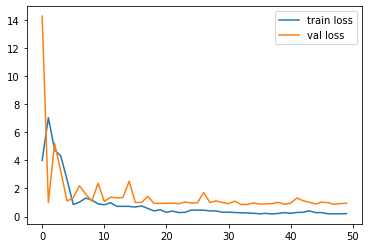

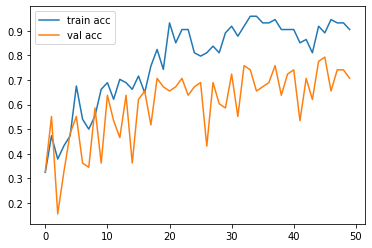

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
## saving the model as h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [23]:
y_pred = model.predict(test_set) 

In [24]:
y_pred

array([[1.61708128e-02, 9.27394032e-01, 5.64352013e-02],
       [4.71840804e-06, 4.19599906e-04, 9.99575675e-01],
       [7.39660338e-02, 4.59040403e-01, 4.66993511e-01],
       [3.02857626e-03, 9.09906209e-01, 8.70652199e-02],
       [1.79059803e-02, 9.27004576e-01, 5.50894663e-02],
       [1.13829009e-01, 5.47393132e-03, 8.80697072e-01],
       [1.40067905e-01, 2.10256893e-02, 8.38906407e-01],
       [2.88004958e-04, 9.92294192e-01, 7.41775660e-03],
       [9.92239356e-01, 1.36298372e-03, 6.39763521e-03],
       [8.38454906e-03, 4.75064188e-01, 5.16551197e-01],
       [5.21978401e-02, 1.53036833e-01, 7.94765294e-01],
       [1.18758008e-01, 6.85738742e-01, 1.95503205e-01],
       [1.61799998e-03, 6.20764434e-01, 3.77617508e-01],
       [2.20639631e-01, 5.72549224e-01, 2.06811100e-01],
       [9.86700654e-02, 1.88841787e-03, 8.99441540e-01],
       [7.66973644e-02, 6.43370092e-01, 2.79932559e-01],
       [3.25169802e-01, 4.00688201e-01, 2.74142057e-01],
       [9.67980269e-03, 1.81672

In [25]:
y_pred  = np.argmax(y_pred, axis = 1)

In [26]:
y_pred

array([1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1,
       2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1,
       0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 0])

In [27]:
model = load_model('model_resnet50.h5')